# Entrenamiento con datos de entrenamiento
<hr>

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [37]:
df = pd.read_csv("../Datos tratados/Datos_con_ECFP.csv")

In [38]:
X = df.drop(columns=["MorganFP", "SMILES","BBB+/BBB-", "group"])
y = df["BBB+/BBB-"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
pipe = Pipeline([
    ('pca', PCA()),
    ('svc', SVC())
])

In [41]:
param_grid = {
    'pca__n_components': [314],  # Ejemplo de opciones para el número de componentes en PCA
    'svc__C': [10, 100, 1000, 10000],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', "poly"]
}

In [42]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [43]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END pca__n_components=314, svc__C=10, svc__gamma=1, svc__kernel=rbf; total time=   3.6s
[CV] END pca__n_components=314, svc__C=10, svc__gamma=1, svc__kernel=rbf; total time=   3.1s
[CV] END pca__n_components=314, svc__C=10, svc__gamma=1, svc__kernel=rbf; total time=   3.6s
[CV] END pca__n_components=314, svc__C=10, svc__gamma=1, svc__kernel=rbf; total time=   3.9s
[CV] END pca__n_components=314, svc__C=10, svc__gamma=1, svc__kernel=rbf; total time=   3.2s
[CV] END pca__n_components=314, svc__C=10, svc__gamma=1, svc__kernel=poly; total time=   2.4s
[CV] END pca__n_components=314, svc__C=10, svc__gamma=1, svc__kernel=poly; total time=   2.9s
[CV] END pca__n_components=314, svc__C=10, svc__gamma=1, svc__kernel=poly; total time=   2.6s
[CV] END pca__n_components=314, svc__C=10, svc__gamma=1, svc__kernel=poly; total time=   3.3s
[CV] END pca__n_components=314, svc__C=10, svc__gamma=1, svc__kernel=poly; total time=   3.3s
[CV

GridSearchCV(cv=5, estimator=Pipeline(steps=[('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [314],
                         'svc__C': [10, 100, 1000, 10000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [44]:
grid_search.best_params_

{'pca__n_components': 314,
 'svc__C': 100,
 'svc__gamma': 0.01,
 'svc__kernel': 'rbf'}

In [45]:
grid_search.best_score_

0.8718975180144115

# Entrenamiento con los datos de prueba
<hr>

In [46]:
pipe = Pipeline([
    ('pca', PCA(n_components=314)),
    ('svc', SVC(C=100, gamma=0.01, kernel="rbf", probability=True))
])

In [47]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=314)),
                ('svc', SVC(C=100, gamma=0.01, probability=True))])

# Resultados del modelo
<hr>

In [48]:
y_predicha = pipe.predict(X_test)

In [49]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.874
Recall 0.874
precision 0.874
f1 0.874


In [50]:
y_entrenamiento = pipe.predict(X_train)

In [51]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.98
Recall 0.98
precision 1.0
f1 0.98


# Confusion Matrix
<hr>

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [53]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

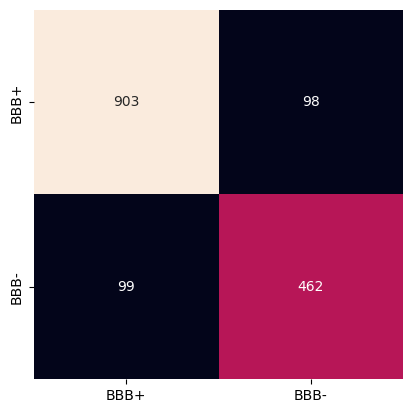

In [54]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

# Guardar modelo
<hr>

In [55]:
import joblib

In [56]:
joblib.dump(pipe, '../Guardado de modelos/modelo_SVM.joblib')

['../Guardado de modelos/modelo_SVM.joblib']